# Assignment #02

# K-Mean Clustering

# definition
# K-means clustering is a simple unsupervised learning algorithm that is used to solve clustering problems. It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand. The clusters are then positioned as points and all observations or data points are associated with the nearest cluster, computed, adjusted and then the process starts over using the new adjustments until a desired result is reached.

In [1]:
# Libraries
import numpy as np
import pandas as pd

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib. pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('Salary.csv')

In [4]:
df.head()

,Name,Age,Salary(PKR)
0,Moeez,27,75000
1,Ali,29,90000
2,Ather,29,71000
3,Ahmed,28,55000
4,Mustafa,41,150000


Text(0, 0.5, 'Salary(PKR)')

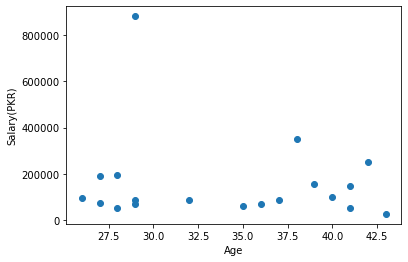

In [5]:
plt.scatter(df.Age,df['Salary(PKR)'])
plt.xlabel('Age')
plt.ylabel('Salary(PKR)')

In [6]:
KMns=KMeans(n_clusters=3)
y_pre=KMns.fit_predict(df[['Age','Salary(PKR)']])
y_pre

array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0])

In [7]:
df['cluster']=y_pre

In [8]:
df.head()

,Name,Age,Salary(PKR),cluster
0,Moeez,27,75000,0
1,Ali,29,90000,0
2,Ather,29,71000,0
3,Ahmed,28,55000,0
4,Mustafa,41,150000,0


In [9]:
KMns.cluster_centers_

array([[3.45000000e+01, 8.43571429e+04],
       [2.90000000e+01, 8.80000000e+05],
       [3.37500000e+01, 2.46250000e+05]])

In [10]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

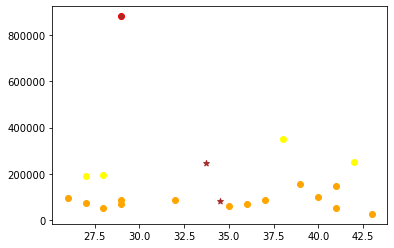

In [13]:
plt.scatter(df1.Age,df1['Salary(PKR)'],color='Orange')
plt.scatter(df2.Age,df2['Salary(PKR)'],color='Red')
plt.scatter(df3.Age,df3['Salary(PKR)'],color='Yellow')
plt.scatter(KMns.cluster_centers_[:,0],KMns.cluster_centers_[:,1],color='Brown',marker='*',label='centroids')

In [14]:
slr=MinMaxScaler()
slr.fit(df[['Salary(PKR)']])
df['Salary(PKR)']=slr.transform(df[['Salary(PKR)']])

In [16]:
slr.fit(df[['Age']])
df['Age']=slr.transform(df[['Age']])

In [17]:
df.head()

,Name,Age,Salary(PKR),cluster
0,Moeez,0.058824,0.055164,0
1,Ali,0.176471,0.072770,0
2,Ather,0.176471,0.050469,0
3,Ahmed,0.117647,0.031690,0
4,Mustafa,0.882353,0.143192,0


# Again repeat

Text(0, 0.5, 'Salary(PKR)')

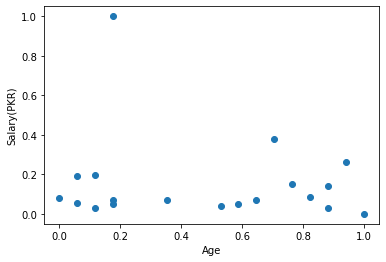

In [18]:
plt.scatter(df.Age,df['Salary(PKR)'])
plt.xlabel('Age')
plt.ylabel('Salary(PKR)')

In [19]:
KMns=KMeans(n_clusters=3)
y_pre=KMns.fit_predict(df[['Age','Salary(PKR)']])
y_pre

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 0])

In [20]:
df['cluster']=y_pre

In [21]:
df.head()

,Name,Age,Salary(PKR),cluster
0,Moeez,0.058824,0.055164,1
1,Ali,0.176471,0.072770,1
2,Ather,0.176471,0.050469,1
3,Ahmed,0.117647,0.031690,1
4,Mustafa,0.882353,0.143192,0


In [22]:
KMns.cluster_centers_

array([[0.77647059, 0.12053991],
       [0.13235294, 0.09316315],
       [0.17647059, 1.        ]])

In [23]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

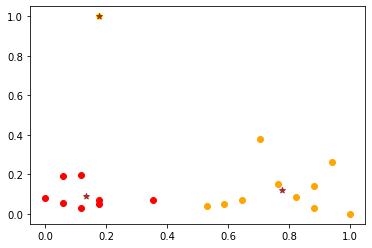

In [24]:
plt.scatter(df1.Age,df1['Salary(PKR)'],color='Orange')
plt.scatter(df2.Age,df2['Salary(PKR)'],color='Red')
plt.scatter(df3.Age,df3['Salary(PKR)'],color='Yellow')
plt.scatter(KMns.cluster_centers_[:,0],KMns.cluster_centers_[:,1],color='Brown',marker='*',label='centroids')

# Plot

In [25]:
sse=[]
k_rng=range(1,20)
for k in k_rng:
    KMns=KMeans(n_clusters=k)
    KMns.fit(df[['Age','Salary(PKR)']])
    sse.append(KMns.inertia_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
sse

[3.148469530565284,
 1.1875033837085858,
 0.4547927638071772,
 0.2690527597902178,
 0.18142523246091374,
 0.14178067151358098,
 0.10753001895097145,
 0.07882232396260193,
 0.05059099097194116,
 0.03145774398744852,
 0.023003326935456297,
 0.017239018587884358,
 0.01176818990468089,
 0.008704576433262641,
 0.0058005849534776156,
 0.003794962621383562,
 0.0019959791836887545,
 0.00024865546959377524,
 0.0]

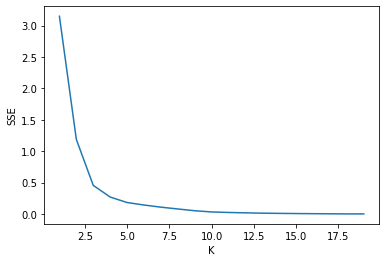

In [27]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)